In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import os

In [80]:
# Load the data from the provided CSV file
# current_dir = 
file_path = 'data/graph_data.csv'
data = pd.read_csv(file_path, delimiter=';')

In [81]:
data.head(5)

,id node1,id node2,name node1,name node2,parent id node1,parent id node2,parent name node1,parent name node2,edge confidence,edge weight(med nof)
0,127,504,rh.caudalmiddlefrontal_11,Right-Putamen,9,37,ctx-rh-caudalmiddlefrontal,Right-Putamen,411,25.0
1,127,145,rh.caudalmiddlefrontal_11,rh.precentral_19,9,10,ctx-rh-caudalmiddlefrontal,ctx-rh-precentral,294,5.0
2,127,131,rh.caudalmiddlefrontal_11,rh.caudalmiddlefrontal_6,9,9,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalmiddlefrontal,327,8.0
3,127,494,rh.caudalmiddlefrontal_11,rh.insula_10,9,34,ctx-rh-caudalmiddlefrontal,ctx-rh-insula,328,6.0
4,127,189,rh.caudalmiddlefrontal_11,rh.caudalanteriorcingulate_5,9,13,ctx-rh-caudalmiddlefrontal,ctx-rh-caudalanteriorcingulate,217,3.0


In [77]:
l = data["parent id node1"].astype('int')
max(l)

83

In [82]:
# Extract the necessary information
nodes = np.union1d(data['id node1'].values, data['id node2'].values)
num_nodes = len(nodes)
edges = list(zip(data['id node1'], data['id node2']))

print(f"# nodes:{num_nodes}, # edges:{len(edges)}")

# nodes:480, # edges:1000


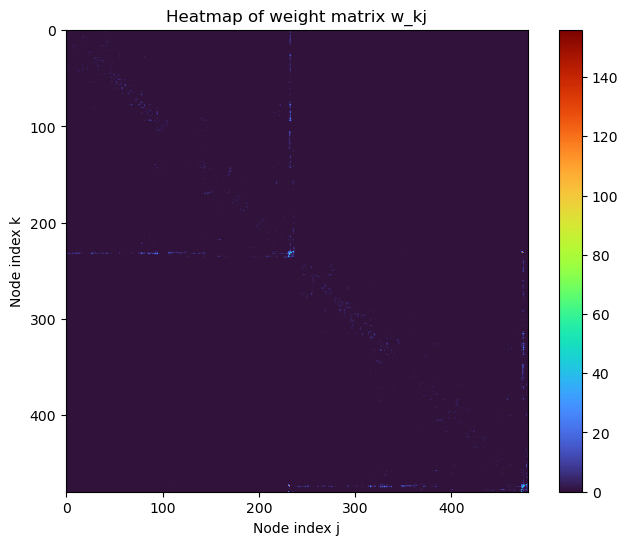

In [85]:
# Create a mapping from node ID to index
node_to_index = {node_id: index for index, node_id in enumerate(nodes)}

w_kj = np.zeros((num_nodes, num_nodes))
        

for _, row in data.iterrows():
    idx1 = node_to_index[row['id node1']]
    idx2 = node_to_index[row['id node2']]
    weight = row['edge weight(med nof)']
    w_kj[idx1, idx2] = weight
    w_kj[idx2, idx1] = weight

# Plotting the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(w_kj, cmap='turbo')
plt.colorbar(heatmap)
plt.title('Heatmap of weight matrix w_kj')
plt.xlabel('Node index j')
plt.ylabel('Node index k')
plt.show()